In [1]:
import numpy as np
import pandas as pd
import plots

In [10]:
country_list = ["US","Italy","Israel","Sweden","Spain","Canada","United Kingdom"]

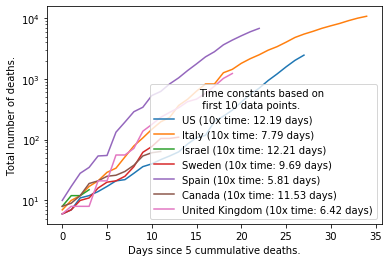

In [12]:
plots.semilog_deaths_since(country_list,
                          threshold_num_cases=5,
                          time_constant_type=10,
                          num_datapoints_fit=10,
                          fit_first_last="first")

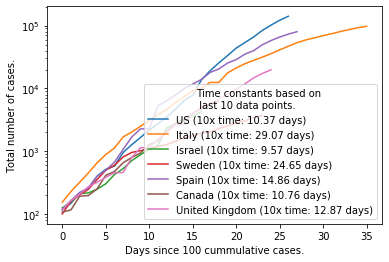

In [13]:
plots.semilog_cases_since(country_list,
                          threshold_num_cases=100,
                          time_constant_type=10,
                          num_datapoints_fit=10,
                          fit_first_last="last")

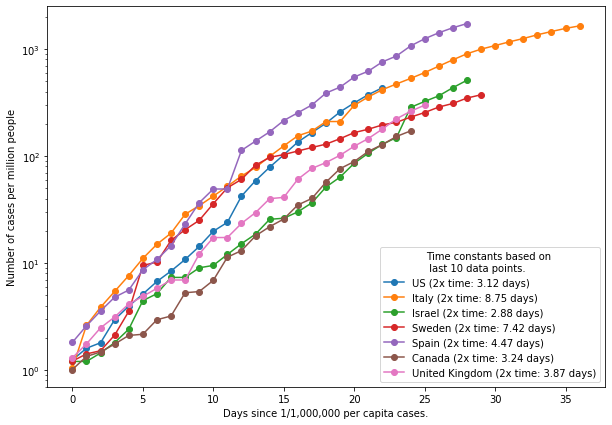

In [14]:
plots.semilog_cases_per_capita_since(country_list,
                          threshold_per_capita=1,
                          time_constant_type=2,
                          num_datapoints_fit=10,
                          fit_first_last="last")

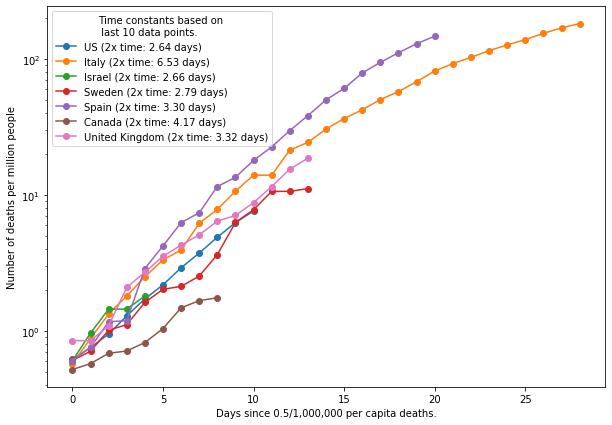

In [15]:
plots.semilog_deaths_per_capita_since(country_list,
                          threshold_per_capita=0.5,
                          time_constant_type=2,
                          num_datapoints_fit=10,
                          fit_first_last="last")

A total of 177 countries confirmed at least one case of covid-19
Mean death rate for US: 0.0266 (+-0.0177 std)
Mean death rate for Italy: 0.0610 (+-0.0296 std)
Mean death rate for Israel: 0.0024 (+-0.0011 std)
Mean death rate for Sweden: 0.0128 (+-0.0110 std)
Mean death rate for Spain: 0.0422 (+-0.0245 std)
Mean death rate for Canada: 0.0103 (+-0.0029 std)
Mean death rate for United Kingdom: 0.0322 (+-0.0184 std)


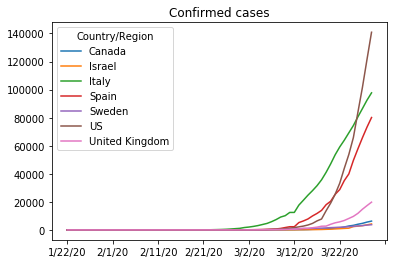

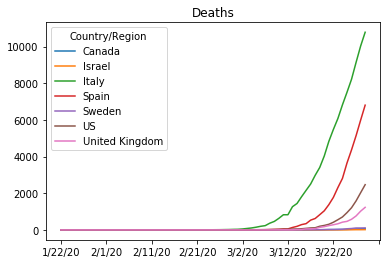

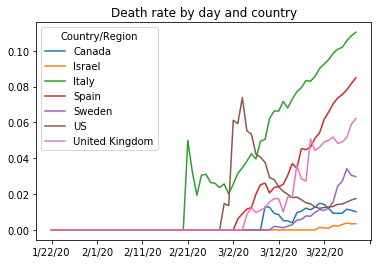

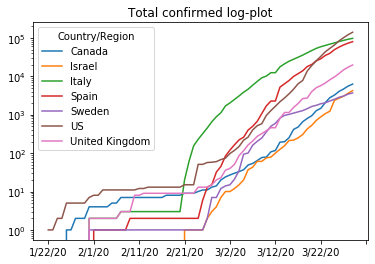

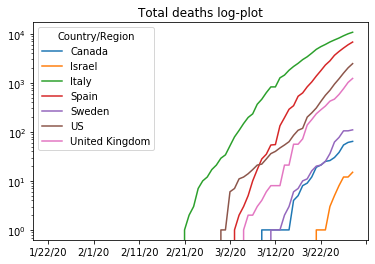

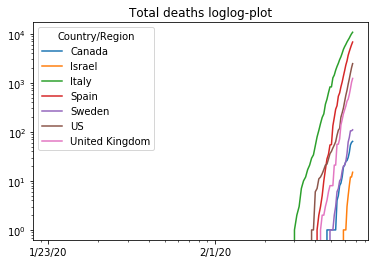

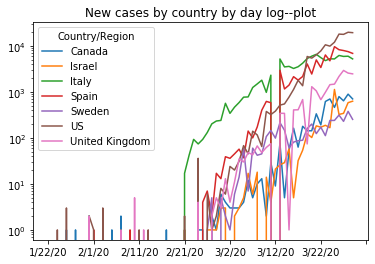

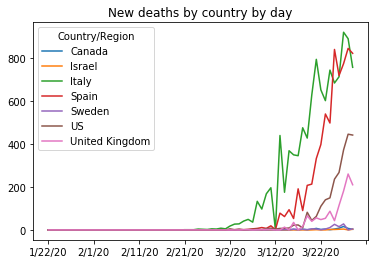

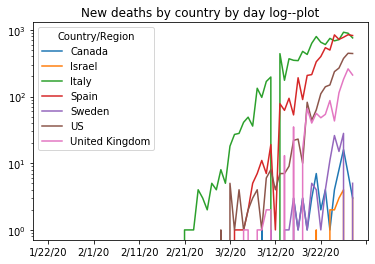

In [8]:
plots.generate_all_plots(["US","Italy","Israel","Sweden","Spain","Canada","United Kingdom"])